##This is the notebook that will serve as the first go through of the Pima Native Americans datasets from Kaggle.

<h3>Goals of this project</h3>
- Develop a strong structure to follow, as in a framework so I have the ability to use this a guide for future projects.

- Commit to GitHub so I can track my progress

- Learn how to containerize this later

- Learn how to build this in streamlit

- Foster my intuition on which plots are the best for certain types of data

- Standardize and normalize data quickly

- Feature Engineering ideas

- Deploy to Heroku

- Play with Google Cloud Platform

- Practice modularizing my code to make it easier to use

#Questions

- What kind of data are dealing with - structured or unstructred?
  - Structured data for sure

- Does the data have categorical, numerical, ordinal, or time series data?
  - 

- What are my feature variables (inputs) and what are my target variables (outputs)?

- Are we missing any data?

- Are we dealing with outliers?


#Data Dictionary

* *FYI: Everyone person in this dataset is a woman at age 21 or higher*

| Column | Meaning | Thoughts |
|------- | ------- | -------- |
|Pregnancies | Number of times pregnant | An integer.  What is the min and what is the max?  |
| Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test | Measured in mmol/L?  1 mmol/L = 18 mg/dL.  I need to multiply by 18 to get the measurement for the HOMA IR Score|
|Blood Pressure | Diastolic blood pressure | mm Hg.  Can we figure out the systolic?  The number we are given is the second one -- 120/80 |
|SkinThickness | Triceps skin fold thickness (mm) | This seems kinda normal|
|Insulin | 2 hour serum insuling (muU/ml) | Measured in muU/ml.|
|BMI | Body mass index (weight in kg/(height in meters)<sup>2</sup> | Traditional measurement |
|Diabetes Pedigree | Diabetes Pedigree Function | A function used to determine whether you have diabetes given your family history |
|Age | Age in years| This is a normal whole integer |
|Outcome | Class variable (0 or 1) 268 of 768 are 1, the others are 0|  We have an imbalance so we can handle that but let's start without that|


HOMA - IR Blood Code 
- Insulin * Glucose = HOMA-IR
- Healthy is 0.5 - 1.5
- Less than 1.0 means you are insulin- sensitive, which is optimal
- A range of 1 - 1.9 is within "Normal limits"
- Above 1.9 indicates early insuling resistance
- Above 2.9 indicates significant signal resistance

#Models

What models do I want to use?
  - Random Forrest
  - Lasso
  - SVM
  - Dense network of 2 layers
  - Linear SVC
  - Gradient Boosting


Start with defaults and then try messing with hyperparementers

I will use a handful of architectures and then call all of them "Model 1" and see which does the best

- Model 1
  - No feature engineering, little normalization / standardization

- Model 2
  - Feature engineering to see if it helps

- Model 3
  - Adjust hyperparameters in models

- Model 4
  - A dense network to see how deep learning does

##Import the libraires and then lets get into the data and see what we need to work on

In [82]:
#Import libraries
!pip install wandb -qq

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Slider, Button, RadioButtons
import plotly as pt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.cluster import KMeans

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import wandb

import xgboost as xgb

from google.colab import files
from google.colab import drive
drive.mount("/content/gdrive")

import os
os.chdir("/content/gdrive/My Drive/Startup Projects/Medical (Democratize)/People/Diabetes-Data/Diabetes Prediction/Pima/Data/")

%matplotlib inline

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
def background_check(dataframe):
  print("#" * 100)
  print(dataframe.head())

  print("#" * 100)
  print(dataframe.info())

  print("#" * 100)
  print(dataframe.describe)

  print("#" * 100)
  print(dataframe.tail())

  print("#" * 100)
  print(dataframe.columns)

  print("#" * 100)
  print(dataframe.dtypes)

  print("#" * 100)
  print(dataframe.shape)

background_check(diabetes)

####################################################################################################
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
####################################################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1 

#What do we need to standardize and normalize?



In [4]:
#We can try a tree method almost immediately since it is insensitive to scale
from sklearn import preprocessing

diabetes_normalized = diabetes.copy()

column = 'Pregnancies'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'Glucose'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'BloodPressure'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'SkinThickness'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'Insulin'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'BMI'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'Age'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'DiabetesPedigreeFunction'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 


print(diabetes_normalized.head())

   Pregnancies   Glucose  ...       Age  Outcome
0     0.352941  0.743719  ...  0.617284        1
1     0.058824  0.427136  ...  0.382716        0
2     0.470588  0.919598  ...  0.395062        1
3     0.058824  0.447236  ...  0.259259        0
4     0.000000  0.688442  ...  0.407407        1

[5 rows x 9 columns]


#Let's Build a Model!

In [5]:
diabetes_normalized.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

#What do we need to impute now?  Are there missing data?  Are the classes balanced?  How do we balance them?

#TO DO:
- Split the data into train and test freshly
  - Remeber you have other projects that can help you split this correctly.  Take it simply
- Try to build the dense network from scratch again
  - Remember you have done this before.  You know how to do it. Be patient, you have this.
- Try XGBoost
  - This will be super cool to try


#I need a training set - 80% of the data 
#I need a test set - 20% of the data

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
def dense_network():
  #You have a rank 9 tensor 
  print(diabetes_normalized.shape)

  print(diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].shape)
  print(diabetes_normalized["Outcome"].shape)

  #training_set = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DibaetesPedigreeFunction", "Age"]].head(614)
  validation_set = diabetes_normalized["Outcome"].tail(154)

  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape = (768, 8)),                          
      tf.keras.layers.Dense(768, activation = "relu"),
      tf.keras.layers.Dense(128, activation = "relu"),
      tf.keras.layers.Dense(32, activation = "relu"),
      tf.keras.layers.Dense(1, activation = "sigmoid")
  ])

  model.compile(optimizer = "Adam",
                loss = "binary_crossentropy",
                metrics = ["accuracy"])
  
  model.fit(x = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]],
            y = diabetes_normalized["Outcome"],
            epochs = 300,
            batch_size = 32,
            shuffle = True
           )
  
dense_network()

(768, 9)
(768, 8)
(768,)
Epoch 1/300
24/24 [==============================] - 3s 2ms/step - loss: 0.6746 - accuracy: 0.6321
Epoch 2/300
24/24 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.6797
Epoch 3/300
24/24 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.7146
Epoch 4/300
24/24 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.7319
Epoch 5/300
24/24 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7551
Epoch 6/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7746
Epoch 7/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.7972
Epoch 8/300
24/24 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7539
Epoch 9/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7708
Epoch 10/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4414 - a

In [9]:
def dense_network_with_validation():
  '''
  print(diabetes_normalized.shape)

  print(diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].shape)
  print(diabetes_normalized["Outcome"].shape)

  training_set = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DibaetesPedigreeFunction", "Age"]].head(614)
  training_labels = diabetes_normalized["Outcome"].head(614)

  print(training_set.shape, "Training set shape: should be (614, 8)")
  print(trainig_labels.shape, "Training labele shape: should be (614,)")

  validation_set = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].tail(154)
  validaiton_labels = diabetes_normalized["Outcome"].tail(154)

  print(validation_set.shape, "Validation set shape: should be (154, 8)")
  print(validation_labels.shape, "Validation label shape: should be (154,)")
  '''

  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape = (768, 8)),                          
      tf.keras.layers.Dense(768, activation = "relu"),
      tf.keras.layers.Dropout(0.8),
      #tf.keras.layers.Dense(32, activation = "relu"),
      tf.keras.layers.Dense(1, activation = "sigmoid")
  ])

  model.compile(optimizer = tf.keras.optimizers.Adam(0.0001),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])

  history = model.fit(x = diabetes_normalized[["Pregnancies", "Glucose", "SkinThickness", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]],
            y = diabetes_normalized["Outcome"],
            epochs = 300,
            batch_size = 10,
            shuffle = True,
            validation_split = 0.2,
            verbose = 1
           )
  
  model.save("Dense Model working!")
  
  return history

In [10]:
dense_history = dense_network_with_validation()

Epoch 1/300
62/62 [==============================] - 1s 10ms/step - loss: 0.6920 - accuracy: 0.5331 - val_loss: 0.6790 - val_accuracy: 0.6429
Epoch 2/300
62/62 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.6347 - val_loss: 0.6707 - val_accuracy: 0.6429
Epoch 3/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.6733 - val_loss: 0.6662 - val_accuracy: 0.6429
Epoch 4/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.6624 - val_loss: 0.6633 - val_accuracy: 0.6429
Epoch 5/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6487 - val_loss: 0.6612 - val_accuracy: 0.6429
Epoch 6/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.6368 - val_loss: 0.6593 - val_accuracy: 0.6429
Epoch 7/300
62/62 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6591 - val_loss: 0.6576 - val_accuracy: 0.6429
Epoch 8/300


In [11]:
dense_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

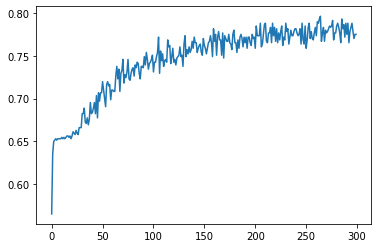

In [12]:
plt.plot(dense_history.history["accuracy"])

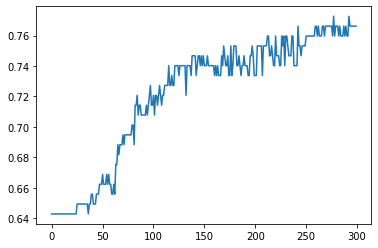

In [13]:
plt.plot(dense_history.history["val_accuracy"])

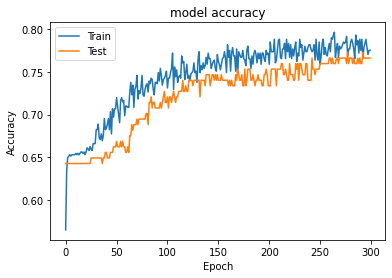

In [14]:
plt.plot(dense_history.history["accuracy"])
plt.plot(dense_history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

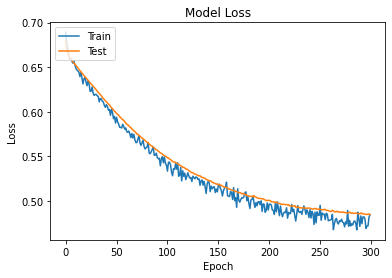

In [15]:
plt.plot(dense_history.history["loss"])
plt.plot(dense_history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

In [16]:
def dense_network_checkpoints():
  '''
  print(diabetes_normalized.shape)

  print(diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].shape)
  print(diabetes_normalized["Outcome"].shape)

  training_set = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DibaetesPedigreeFunction", "Age"]].head(614)
  training_labels = diabetes_normalized["Outcome"].head(614)

  print(training_set.shape, "Training set shape: should be (614, 8)")
  print(trainig_labels.shape, "Training labele shape: should be (614,)")

  validation_set = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].tail(154)
  validaiton_labels = diabetes_normalized["Outcome"].tail(154)

  print(validation_set.shape, "Validation set shape: should be (154, 8)")
  print(validation_labels.shape, "Validation label shape: should be (154,)")
  '''

  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape = (768, 8)),                          
      tf.keras.layers.Dense(768, activation = "relu"),
      tf.keras.layers.Dropout(0.8),
      tf.keras.layers.Dense(1, activation = "sigmoid")
  ])

  model.compile(optimizer = tf.keras.optimizers.Adam(0.0001),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])
  

  from tensorflow.keras.callbacks import ModelCheckpoint

  checkpoint_path = "model_checkpoints/checkpoint"
  checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                               monitor = "val_loss",
                               frequency = "epoch",
                               save_best_only = True,
                               verbose = 1)
  
  history = model.fit(x = diabetes_normalized[["Pregnancies", "Glucose", "SkinThickness", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]],
                      y = diabetes_normalized["Outcome"],
                      epochs = 1000,
                      batch_size = 10,
                      shuffle = True,
                      validation_split = 0.2,
                      verbose = 1,
                      callbacks = [checkpoint]
           )
  
  model.save("../Code/")
  
  return history

In [17]:
dense_history_with_checkpoints = dense_network_checkpoints()

Epoch 1/1000
62/62 [==============================] - 1s 8ms/step - loss: 0.6907 - accuracy: 0.5654 - val_loss: 0.6770 - val_accuracy: 0.6429

Epoch 00001: val_loss improved from inf to 0.67701, saving model to model_checkpoints/checkpoint
INFO:tensorflow:Assets written to: model_checkpoints/checkpoint/assets
Epoch 2/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.6603 - val_loss: 0.6680 - val_accuracy: 0.6429

Epoch 00002: val_loss improved from 0.67701 to 0.66803, saving model to model_checkpoints/checkpoint
INFO:tensorflow:Assets written to: model_checkpoints/checkpoint/assets
Epoch 3/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.6486 - val_loss: 0.6635 - val_accuracy: 0.6429

Epoch 00003: val_loss improved from 0.66803 to 0.66348, saving model to model_checkpoints/checkpoint
INFO:tensorflow:Assets written to: model_checkpoints/checkpoint/assets
Epoch 4/1000
62/62 [==============================] - 0s 4m

In [18]:
!ls -lh model_checkpoint

ls: cannot access 'model_checkpoint': No such file or directory


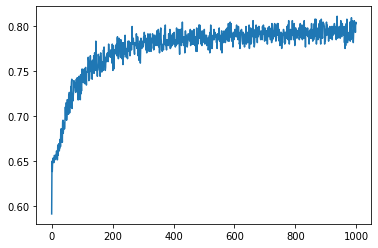

In [19]:
plt.plot(dense_history_with_checkpoints.history["accuracy"])

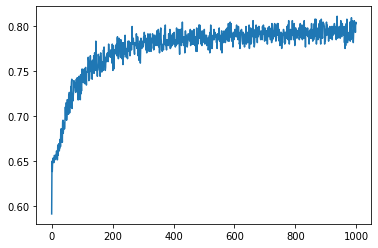

In [20]:
plt.plot(dense_history_with_checkpoints.history["accuracy"])

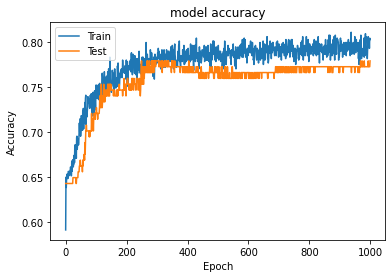

In [21]:
plt.plot(dense_history_with_checkpoints.history["accuracy"])
plt.plot(dense_history_with_checkpoints.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

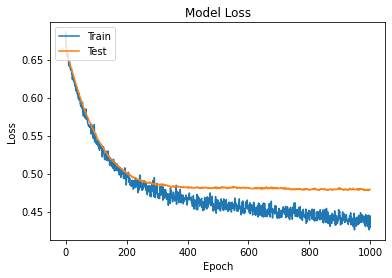

In [22]:
plt.plot(dense_history_with_checkpoints.history["loss"])
plt.plot(dense_history_with_checkpoints.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

#XGBOOST TIME!!!!

What is XGBoost exactly?  In XGBoost's own words it is a optimied distributed gradients boosting library designed to be highly **efficient**, **flexible**, and **portable**.  It implements machine learning algorithms under the Gradient Boosting framework.  XGBoost provides a parallel tree boosting (also know as GBDT, GBM) that solve many data science problems in a fast and accurate way.  The same code runs on major distributed environments (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [64]:
X = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "SkinThickness", "DiabetesPedigreeFunction", "Age"]]
y = diabetes_normalized["Outcome"]

print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

xg_cl = xgb.XGBClassifier(objective = "binary:logistic",
                          n_estimators = 250,
                          max_depth = 4,                        
                          seed = 123)

xg_cl.fit(X, y)

preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds == y_test)) / y_test.shape[0]
mae = mean_absolute_error(y_test, preds)

print("Accuracy: %f" % (accuracy))
print("Mean Absolute Error: %f" % (mae))

kfold = KFold(n_splits = 10, random_state = 7)
results = cross_val_score(xg_cl, X_train, y_train, cv = kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean() * 100, results.std() * 100))

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64
Accuracy: 1.000000
Mean Absolute Error: 0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Accuracy: 74.93% (4.53%)


In [70]:
def xgboost_with_dmatrices_this_time():

  dtrain = xgb.DMatrix(X_train, label = y_train)
  dtest = xgb.DMatrix(X_test, label = y_test)

  mean_train = np.mean(y_train)
  baseline_predictions = np.ones(y_test.shape) * mean_train
  mae_baseline = mean_absolute_error(y_test, baseline_predictions)

  print("Baseline MAE is {:.2f}".format(mae_baseline))

  params = {
      "max_depth": 6,
      "min_child_weight": 1,
      "eta": .3,
      "subsample": 1,
      "colsample_bytree": 1,
      "objective": "reg:linear",
  }

  params["eval_metric"] = "mae"
  num_boost_round = 999

  model = xgb.train(
      params,
      dtrain,
      num_boost_round = num_boost_round,
      evals = [(dtest, "Test")],
      early_stopping_rounds = 10
  )

  print("Best MAE: {:.2f} with {} rounds".format(model.best_score, model.best_iteration + 1))

  cv_results = xgb.cv(
      params,
      dtrain,
      num_boost_round = num_boost_round,
      seed = 42,
      nfold = 5,
      metrics = {"mae"},
      early_stopping_rounds = 10
  )

  cv_results

  gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9, 12)
    for min_child_weight in range(5, 8)
  ]
  
xgboost_with_dmatrices_this_time()

Baseline MAE is 0.46
[21:08:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.430899
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.390405
[2]	Test-mae:0.363777
[3]	Test-mae:0.339177
[4]	Test-mae:0.322475
[5]	Test-mae:0.311383
[6]	Test-mae:0.301617
[7]	Test-mae:0.298435
[8]	Test-mae:0.289221
[9]	Test-mae:0.285428
[10]	Test-mae:0.28344
[11]	Test-mae:0.283558
[12]	Test-mae:0.281511
[13]	Test-mae:0.27988
[14]	Test-mae:0.27881
[15]	Test-mae:0.27949
[16]	Test-mae:0.279961
[17]	Test-mae:0.280299
[18]	Test-mae:0.279821
[19]	Test-mae:0.279716
[20]	Test-mae:0.279714
[21]	Test-mae:0.281831
[22]	Test-mae:0.282623
[23]	Test-mae:0.28144
[24]	Test-mae:0.284826
Stopping. Best iteration:
[14]	Test-mae:0.27881

Best MAE: 0.28 with 15 rounds
[21:08:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:08:49] WARNING: /workspace

In [41]:
def xgboost_grid():
  parameters = {'nthread':[1, 10], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.00001, 0.01], #so called `eta` value
              'max_depth': [1, 1000],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1, 10], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}
    
  clf = GridSearchCV(xg_cl, 
                     parameters, 
                     n_jobs = 5,
                     scoring = "roc_auc", 
                     verbose = 2, 
                     refit = True
                     )

  clf.fit(X, y)

  best_parameters = clf.best_params_ 

  print(best_parameters)

xgboost_grid()

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 1000, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 10, 'nthread': 1, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}


[Parallel(n_jobs=5)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done  71 out of  80 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:    0.8s finished


#SVM

What is an SVM?  An SVM is a type of supervised learning model with associated learning algorithms that analyze data for classification and regression analysis!

In [81]:
def svm_classifer():
  model = SVC()

  param_grid = {
      'C': [0.1, 1, 10, 100, 1000],  
      'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
      'kernel': ['rbf']}  

  
  grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

  grid.fit(X_train, y_train)

  print(grid.best_params_)
  print(grid.best_estimator_)

  grid_predictions = grid.predict(X_test)

  print(classification_report(y_test, grid_predictions))

svm_classifer()

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.675, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.691, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.656, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.656, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.656, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.780, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.7s finished


#Clustering

- What is clustering?  We are going to use K-Means Clustering and this method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluset with the nearest mean, serving as a prototype of the cluster

In [100]:
kmeans = KMeans(n_clusters = 2, random_state = 123)

kmeans.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [101]:
kmeans.cluster_centers_

kmeans_pred = kmeans.predict(X_test)

print('Accuracy: {}'.format(accuracy_score(y_test, kmeans_pred)))

Accuracy: 0.2857142857142857


#What did I learn?
  - The big background check function is great
  - Use correlations and heatmaps first to develop intuition behind our data and then use that to build charts instead of charts first

  - Models
    - Random Forests, Xgboost, and a small dense model seemed to work the best with the dense model being the best.
    